# **Missão Prática | Nível 4**

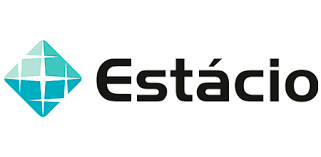

Nome: João Victor Macedo Fernandes Ramos

Campus: Downtown

Curso: Desenvolvimento FullStack

Disciplina: Nível 4: Conhecendo Novos Paradigmas

Turma: 2022.3


### Imports

In [104]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import inquirer

### Classe Grafico


In [105]:
class Grafico:  
  def __init__(self, lista_despesas):
    self.lista_despesas=lista_despesas
    self.imprimir_graf()

  def padrao_do_grafico(self):
    plt.title('Gráficos de Despesas')    
    plt.ylabel('Despesas')
    plt.xlabel('Dias')

  def imprimir_graf(self):
    self.padrao_do_grafico()
    for gastos in self.lista_despesas:
      mLista = gastos.dicionario.items()
      cor = gastos.cor
      nome = gastos.nome
      x, y = zip(*mLista)
      plt.plot(x, y, label = nome, marker='o', markerfacecolor='black', markersize=12, color=cor, linewidth=4)
    plt.legend()
    plt.show()

  def regressao_linear(self, id_grafico):
    gastos = self.lista_despesas[id_grafico]
    mLista = gastos.dicionario.items()    
    cor = gastos.cor
    nome = gastos.nome
    dias, valores = zip(*mLista)
    dias = np.array(dias)
    valores = np.array(valores)
    dias = dias.reshape(-1, 1)
    valores = valores.reshape(-1, 1)
    regressao = LinearRegression()
    regressao.fit(X=dias, y=valores)
    plt.plot(dias, regressao.predict(dias), color='black', label = "Regressão Linear")

    x, y = zip(*mLista)
    plt.plot(x, y, label = nome+str(" - original"), marker='o', markerfacecolor='black', markersize=12, color=cor, linewidth=4)
    plt.legend()
    plt.show()

### Classe Dict

In [106]:
class Dicionario:

    def __init__(self, dicionario, cor, nome):
        self.dicionario = dicionario
        self.cor=cor
        self.nome = nome

### Entrada de dado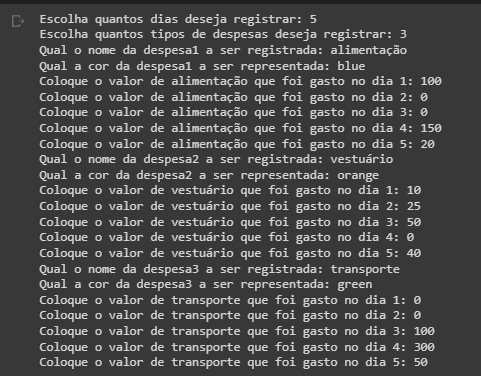

In [117]:

qntd_dias = int(input("Escolha quantos dias deseja registrar: "))
qntd_despesas = int(input("Escolha quantos tipos de despesas deseja registrar: "))


lista_despesas = []
lista_despesas_str = []


for despesa in range(1,qntd_despesas+1):

  tipo_gasto = input(f"Qual o nome da despesa{despesa} a ser registrada: ")

  cor_gasto = input(f"Qual a cor da despesa{despesa} a ser representada: ")

  gasto_dia = {}


  for dia in range(1,qntd_dias+1):

    gasto = int(input(f"Coloque o valor de {tipo_gasto} que foi gasto no dia {dia}: "))

    gasto_dia[dia] = gasto


  lista_despesas_str.append(f"despesa{despesa}, " + tipo_gasto)

  globals()["despesa" + str(despesa)] = Dicionario(gasto_dia, cor_gasto, tipo_gasto)
  lista_despesas.append(globals()["despesa" + str(despesa)])



Escolha quantos dias deseja registrar: 5
Escolha quantos tipos de despesas deseja registrar: 3
Qual o nome da despesa1 a ser registrada: alimentação
Qual a cor da despesa1 a ser representada: blue
Coloque o valor de alimentação que foi gasto no dia 1: 100
Coloque o valor de alimentação que foi gasto no dia 2: 0
Coloque o valor de alimentação que foi gasto no dia 3: 0
Coloque o valor de alimentação que foi gasto no dia 4: 150
Coloque o valor de alimentação que foi gasto no dia 5: 20
Qual o nome da despesa2 a ser registrada: vestuário
Qual a cor da despesa2 a ser representada: orange
Coloque o valor de vestuário que foi gasto no dia 1: 10
Coloque o valor de vestuário que foi gasto no dia 2: 25
Coloque o valor de vestuário que foi gasto no dia 3: 50
Coloque o valor de vestuário que foi gasto no dia 4: 0
Coloque o valor de vestuário que foi gasto no dia 5: 40
Qual o nome da despesa3 a ser registrada: transporte
Qual a cor da despesa3 a ser representada: green
Coloque o valor de transporte 

### Grafico Despesas

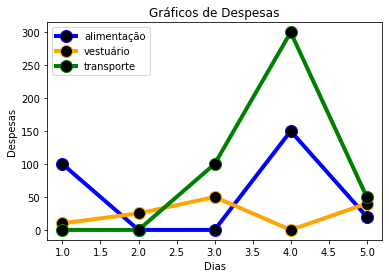

In [118]:
grafico = Grafico(lista_despesas)

### Grafico Regressão Linear

Selecione o index da despesa que deseja ser representada com a regressão linear
despesa1, alimentação o index é 0
despesa2, vestuário o index é 1
despesa3, transporte o index é 2
0


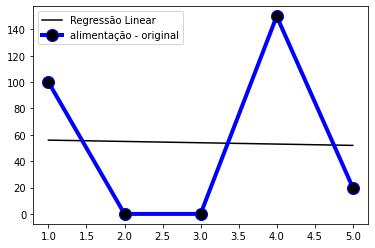

In [119]:
print("Selecione o index da despesa que deseja ser representada com a regressão linear")
for despesa in range(qntd_despesas):
  print(f"{lista_despesas_str[despesa]} o index é {despesa}")

id_despesa = int(input())
grafico.regressao_linear(id_despesa)